In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [27]:
df=pd.read_csv("data.csv")

In [28]:
df.head()

,Patient_ID,Blood_Pressure_Before,Blood_Pressure_After
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [29]:
df.mean()

Patient_ID                 50.50
 Blood_Pressure_Before    133.91
 Blood_Pressure_After     128.36
dtype: float64

In [73]:
df.dtypes

Patient_ID    int64
Before_BP     int64
After_BP      int64
dtype: object

In [74]:
df.columns

Index(['Patient_ID', 'Before_BP', 'After_BP'], dtype='object')

In [30]:
df.describe()

,Patient_ID,Blood_Pressure_Before,Blood_Pressure_After
count,100.000000,100.000000,100.000000
mean,50.500000,133.910000,128.360000
std,29.011492,6.598278,6.888022
min,1.000000,120.000000,118.000000
25%,25.750000,128.000000,123.000000
50%,50.500000,135.000000,128.000000
75%,75.250000,139.250000,135.000000
max,100.000000,148.000000,141.000000


In [31]:
mean_before= 133.91
mean_after=128.36

In [60]:
new_columns = ['Patient_ID', 'Before_BP', 'After_BP']


In [61]:
df.columns = new_columns


In [62]:
print(df.columns)
print(df.dtypes)

Index(['Patient_ID', 'Before_BP', 'After_BP'], dtype='object')
Patient_ID    int64
Before_BP     int64
After_BP      int64
dtype: object


In [64]:
before_range = np.ptp(df['Before_BP'])
after_range = np.ptp(df['After_BP'])


In [65]:
before_variance = np.var(df['Before_BP'])
after_variance = np.var(df['After_BP'])

In [66]:
print("Range of 'Before_BP':", before_range)
print("Range of 'After_BP':", after_range)
print("Variance of 'Before_BP':", before_variance)
print("Variance of 'After_BP':", after_variance)

Range of 'Before_BP': 28
Range of 'After_BP': 23
Variance of 'Before_BP': 43.10189999999998
Variance of 'After_BP': 46.97040000000002


In [67]:
# Calculate mean and confidence interval
before_mean = df['Before_BP'].mean()
before_ci = stats.t.interval(0.95, len(df['Before_BP'])-1, loc=before_mean, scale=stats.sem(df['Before_BP']))


In [70]:
after_mean = df['After_BP'].mean()
after_ci = stats.t.interval(0.95, len(df['After_BP'])-1, loc=after_mean, scale=stats.sem(df['After_BP']))

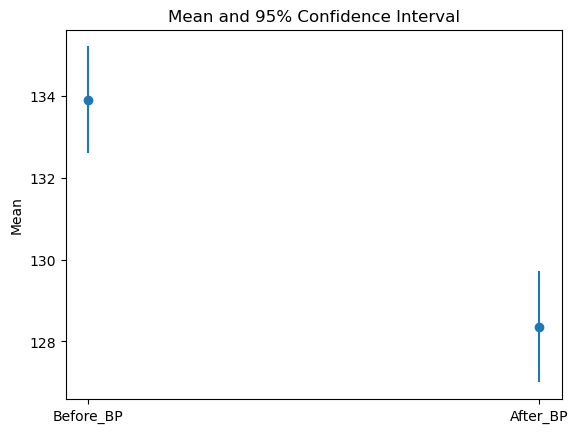

In [71]:
plt.errorbar(['Before_BP', 'After_BP'], [before_mean, after_mean], yerr=[before_ci[1]-before_mean, after_ci[1]-after_mean], fmt='o')
plt.ylabel('Mean')
plt.title('Mean and 95% Confidence Interval')
plt.show()

In [72]:
before_mad = np.mean(np.abs(df['Before_BP'] - before_mean))
after_mad = np.mean(np.abs(df['After_BP'] - after_mean))
print("Mean Absolute Deviation of 'Before_BP':", before_mad)
print("Mean Absolute Deviation of 'After_BP':", after_mad)

Mean Absolute Deviation of 'Before_BP': 5.7118
Mean Absolute Deviation of 'After_BP': 5.9
